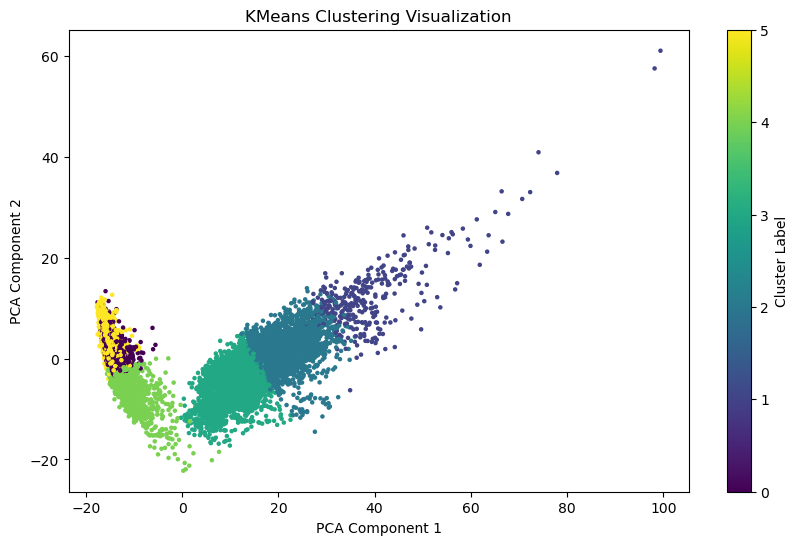

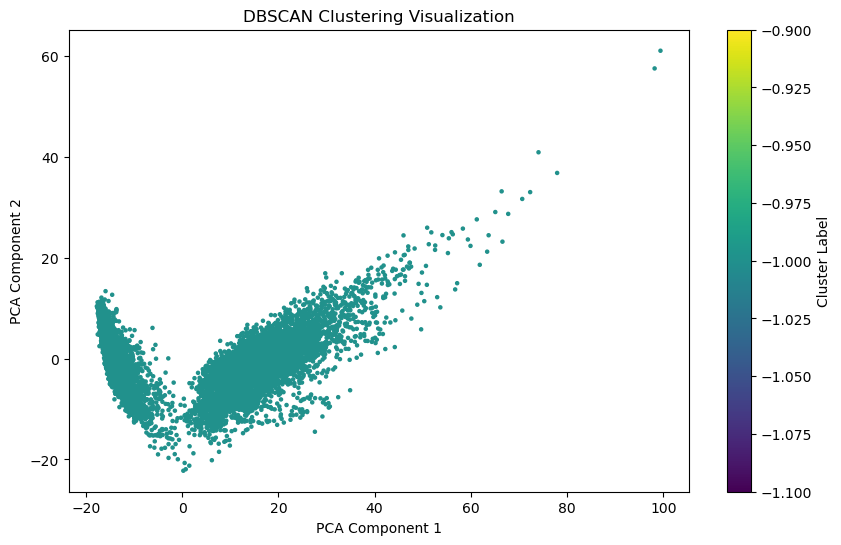

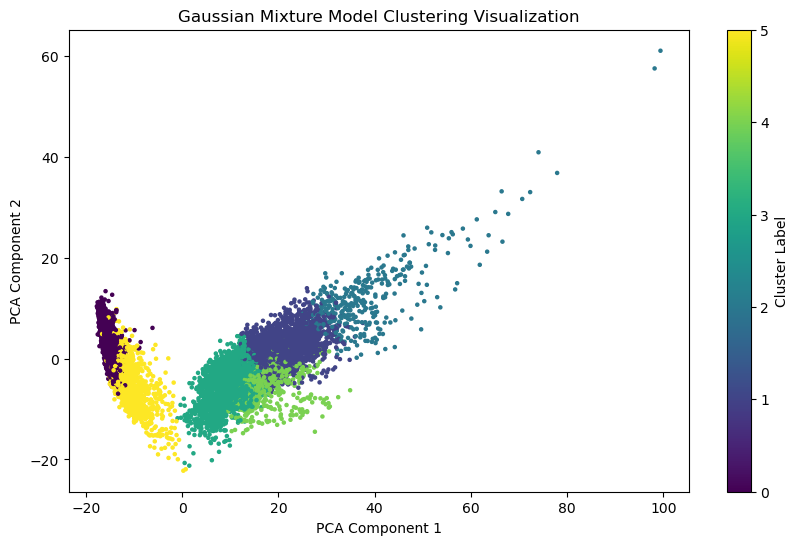

In [1]:
# Import wymaganych bibliotek
import zipfile
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Rozpakowanie pliku ZIP
zip_path = 'Samsung_HAR.zip'
extraction_dir = 'Samsung_HAR_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Wczytanie plików danych
main_dir = os.path.join(extraction_dir, 'samsung_HAR')
test_data = pd.read_csv(os.path.join(main_dir, 'samsung_test.txt'), sep=r'\s+', header=None)
train_data = pd.read_csv(os.path.join(main_dir, 'samsung_train.txt'), sep=r'\s+', header=None)
test_labels = pd.read_csv(os.path.join(main_dir, 'samsung_test_labels.txt'), sep=r'\s+', header=None)
train_labels = pd.read_csv(os.path.join(main_dir, 'samsung_train_labels.txt'), sep=r'\s+', header=None)

# Odpowiedzi na pytania dotyczące obróbki danych:
# 1. Czy potrzeba wszystkich cech? 
#    Nie, nie wszystkie cechy są potrzebne. Możemy zredukować wymiarowość za pomocą PCA, aby uprościć analizę.
# 2. Czy potrzebna jest jakaś obróbka?
#    Tak, dane wymagają skalowania, aby uniknąć dominacji cech o dużych wartościach nad innymi.
# 3. Czy wiemy, jak obrobić?
#    Tak, skalujemy dane i opcjonalnie redukujemy wymiarowość do dwóch wymiarów dla wizualizacji.
# 4. Czy wiemy, co jaka cecha znaczy?
#    Nie, ale analiza matematyczna i klasteryzacja mogą być przeprowadzane bez znajomości znaczenia poszczególnych cech.
# 5. Czy potrzebujemy aż dwóch plików?
#    Nie, w Unsupervised Learning możemy połączyć dane testowe i treningowe, ponieważ nie ma potrzeby podziału.
# 6. Czy podział na dane testowe i treningowe jest potrzebny?
#    Nie, w klasteryzacji Unsupervised Learning podział na dane testowe i treningowe nie jest wymagany.
#    Jeśli jednak chcemy później wykorzystać te dane do Supervised Learning, podział może być potrzebny.

# Scalanie danych
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Skalowanie danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)

# Redukcja wymiarowości do 2D dla wizualizacji
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Klasteryzacja: KMeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=5)
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

# Klasteryzacja: DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', s=5)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

# Klasteryzacja: Gaussian Mixture Models
gmm = GaussianMixture(n_components=6, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_labels, cmap='viridis', s=5)
plt.title("Gaussian Mixture Model Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

# Odpowiedź na pytanie rekrutacyjne:
# Jak różnią się KMeans, K-Fold i K Nearest Neighbors (KNN)?
# - KMeans: Algorytm klasteryzacji dzielący dane na K klastrów w oparciu o odległości od centroidów.
# - K-Fold: Technika walidacji krzyżowej dzieląca dane na K części, służy do oceny modeli Supervised Learning.
# - KNN: Algorytm klasyfikacji lub regresji, który przypisuje etykietę na podstawie większości w najbliższym sąsiedztwie (nearest neighbors).
